# Lab 1 Analysis Example using Thicket

In [87]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [88]:
tk = th.Thicket.from_caliperreader(glob("cali_files/sort1/*.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time"], axis=1)
#tk.dataframe = tk.dataframe.drop(["spot.channel", "Total time"], axis=1)

In [89]:
# Performance data
tk.dataframe

Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              54373920         6.023509   
                                                  59584598         1.141413   
                                                  67065037         3.375063   
                                                  105911008       22.148527   
                                                  135738047        7.400310   
                                                  141829259        3.402592   
                                                  184380683        1.617299   
                                                  290198302       18.263462   
                                                  293257743     3328.373696   
                                                  307428700        0.761032   
                                                  308981384        2.661464   
                                                  339297524      219.289887   
                                                  344932907        5.122451   
                                                  369740385      230.394977   
                                                  402874423        1.901810   
                                                  417354211        1.425560   
                                                  419742891       11.804616   
                                                  444224139        1.465758   
                                                  493166910        8.395511   
                                                  552015685        7.743243   
                                                  615901015        8.459750   
                                                  651939200        1.559119   
                                                  711450200        7.519043   
                                                  817426762       39.941627   
                                                  822016541        8.923427   
                                                  827507331        0.394045   
                                                  848298986      292.539192   
                                                  865756312       27.599465   
                                                  869136206        4.435316   
                                                  981414781        0.763914   
                                                  1022574103       8.596153   
                                                  1088482557       7.603996   
                                                  1107415064       2.490562   
                                                  1113569659       3.618537   
                                                  1170749765       0.575767   
                                                  1183841883       0.755487   
                                                  1186726216      13.126639   
                                                  1206395575      25.048625   
                                                  1262262462      15.644663   
                                                  1289872809      13.077885   
                                                  1353737300       0.521429   
                                                  1359283220       1.642881   
                                                  1375030612       0.269466   
                                                  1433556316       1.465764   
                                                  1490412494       0.072715   
                                                  1500983933     266.736755   
                                                  1529967595       2.411453   
                                                  1603403782       1.060240   
                                                  1609840232       0.371337   
                                 

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [90]:
tk.statsframe.dataframe["time"]= 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 comm_large
│  │  ├─ 1.000 MPI_Recv
│  │  ├─ 1.000 MPI_Scatter
│  │  └─ 1.000 MPI_Send
│  └─ 1.000 comm_small
│     ├─ 1.000 MPI_Bcast
│     ├─ 1.000 MPI_Gather
│     ├─ 1.000 MPI_Recv
│     └─ 1.000 MPI_Send
├─ 1.000 comp
│  ├─ 1.000 comp_large
│  └─ 1.000 comp_small
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [91]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
54373920             2.11.0-dev             128   
59584598             2.11.0-dev               8   
67065037             2.11.0-dev              64   
105911008            2.11.0-dev             256   
135738047            2.11.0-dev             128   
141829259            2.11.0-dev             256   
184380683            2.11.0-dev             128   
290198302            2.11.0-dev               2   
293257743            2.11.0-dev               8   
307428700            2.11.0-dev              16   
308981384            2.11.0-dev              64   
339297524            2.11.0-dev               4   
344932907            2.11.0-dev             256   
369740385            2.11.0-dev            1024   
402874423            2.11.0-dev              64   
417354211            2.11.0-dev             512   
419742891            2.11.0-dev             256   
444224139            2.11.0-dev             128   
493166910            2.11.0-dev             512   
552015685            2.11.0-dev              64   
615901015            2.11.0-dev             512   
651939200            2.11.0-dev              32   
711450200            2.11.0-dev               8   
817426762            2.11.0-dev             512   
822016541            2.11.0-dev             256   
827507331            2.11.0-dev               4   
848298986            2.11.0-dev               2   
865756312            2.11.0-dev               2   
869136206            2.11.0-dev               4   
981414781            2.11.0-dev               2   
1022574103           2.11.0-dev             512   
1088482557           2.11.0-dev              64   
1107415064           2.11.0-dev             128   
1113569659           2.11.0-dev             128   
1170749765           2.11.0-dev               4   
1183841883           2.11.0-dev              16   
1186726216           2.11.0-dev             256   
1206395575           2.11.0-dev             128   
1262262462           2.11.0-dev            1024   
1289872809           2.11.0-dev             128   
1353737300           2.11.0-dev               8   
1359283220           2.11.0-dev              16   
1375030612           2.11.0-dev              64   
1433556316           2.11.0-dev             128   
1490412494           2.11.0-dev               8   
1500983933           2.11.0-dev               2   
1529967595           2.11.0-dev             128   
1603403782           2.11.0-dev               4   
1609840232           2.11.0-dev               4   
1655342701           2.11.0-dev            1024   
1658072546           2.11.0-dev               2   
1667136259           2.11.0-dev             512   
1697460450           2.11.0-dev             512   
1699345197           2.11.0-dev              16   
1715168256           2.11.0-dev               8   
1718715922           2.11.0-dev               8   
1747359441           2.11.0-dev             256   
1749744140           2.11.0-dev               4   
1763738823           2.11.0-dev              32   
1764925281           2.11.0-dev              64   
1771578168           2.11.0-dev            1024   
1794924161           2.11.0-dev             512   
1797999638           2.11.0-dev               4   
1815566252           2.11.0-dev            1024   
1828427390           2.11.0-dev              32   
1830071472           2.11.0-dev            1024   
1834396359           2.11.0-dev             128   
1834472826           2.11.0-dev             256   
1852707344           2.11.0-dev               8   
1891539591           2.11.0-dev            1024   
1910702503           2.11.0-dev             256   
1921182615           2.11.0-dev              32   
1935808403           2.11.0-dev               8   
1952795309           2.11.0-dev             256   
1975866046           2.11.0-dev             512   
1978940941           2.11.0-dev            1024   
1987721265           2.11.0-dev  

In [92]:
gb = tk.groupby("InputSize")
print(gb.keys())
allthickets = list(gb.values())
input65536 = gb[65536].groupby("Algorithm")
input262144 = gb[262144].groupby("Algorithm")
input1048576 = gb[1048576].groupby("Algorithm")
input4194304 = gb[4194304].groupby("Algorithm")
input16777216 = gb[16777216].groupby("Algorithm")
input67108864 = gb[67108864].groupby("Algorithm")
input268435456 = gb[268435456].groupby("Algorithm")


8  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2aee8b2977c0>, 262144: <thicket.thicket.Thicket object at 0x2aee90689310>, 1048576: <thicket.thicket.Thicket object at 0x2aee903c00a0>, 4194304: <thicket.thicket.Thicket object at 0x2aee8b1f2f10>, 16777216: <thicket.thicket.Thicket object at 0x2aee8b108760>, 67108864: <thicket.thicket.Thicket object at 0x2aee8b1d3970>, 167772216: <thicket.thicket.Thicket object at 0x2aee8b3850d0>, 268435456: <thicket.thicket.Thicket object at 0x2aee90040220>}
dict_keys([65536, 262144, 1048576, 4194304, 16777216, 67108864, 167772216, 268435456])
3  thickets created...
{'Bubble Sort(Odd/Even)': <thicket.thicket.Thicket object at 0x2aee8b590b80>, 'MergeSort': <thicket.thicket.Thicket object at 0x2aee8b719d90>, 'Sample Sort': <thicket.thicket.Thicket object at 0x2aee930c9610>}
3  thickets created...
{'Bubble Sort(Odd/Even)': <thicket.thicket.Thicket object at 0x2aee8b4bcf40>, 'MergeSort': <thicket.thicket.Thicket object at 0x2aee901faee0>,

Compose these 3 groups column-wise to get a holistic view of the data

In [93]:
ctk65536 = th.Thicket.concat_thickets(
    thickets=list(input65536.values()),
    headers=list(input65536.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk262144 = th.Thicket.concat_thickets(
    thickets=list(input262144.values()),
    headers=list(input262144.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk1048576 = th.Thicket.concat_thickets(
    thickets=list(input1048576.values()),
    headers=list(input1048576.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk4194304 = th.Thicket.concat_thickets(
    thickets=list(input4194304.values()),
    headers=list(input4194304.keys()),
    axis="columns",
    metadata_key="num_procs"
)
ctk16777216 = th.Thicket.concat_thickets(
    thickets=list(input16777216.values()),
    headers=list(input16777216.keys()),
    axis="columns",
    metadata_key="num_procs"
)
ctk67108864 = th.Thicket.concat_thickets(
    thickets=list(input67108864.values()),
    headers=list(input67108864.keys()),
    axis="columns",
    metadata_key="num_procs"
)
ctk268435456 = th.Thicket.concat_thickets(
    thickets=list(input268435456.values()),
    headers=list(input268435456.keys()),
    axis="columns",
    metadata_key="num_procs"
)



allctk = []
allctk.append(ctk65536)
allctk.append(ctk262144)
allctk.append(ctk1048576)
allctk.append(ctk4194304)
allctk.append(ctk16777216)
allctk.append(ctk67108864)
allctk.append(ctk268435456)

In [94]:
for ctk in allctk:
    display(ctk.dataframe)

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              num_procs                         
{'name': 'main', 'type': 'function'}              2                     18.263462   
                                                  4                     13.695894   
                                                  8                     12.969012   
                                                  16                     3.147513   
                                                  32                     1.559119   
                                                  64                     1.925207   
                                                  128                    2.667785   
                                                  256                    5.122451   
                                                  512                    1.425560   
                                                  1024                   3.319663   
{'name': 'comm', 'type': 'function'}              2                      0.000493   
                                                  4                      3.044797   
                                                  8                      4.600372   
                                                  16                     1.345260   
                                                  32                     0.752068   
                                                  64                     1.030482   
                                                  128                    1.882442   
                                                  256                    4.794907   
                                                  512                    1.334167   
                                                  1024                   3.251050   
{'name': 'comm_large', 'type': 'function'}        2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Recv', 'type': 'function'}          2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32             

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              num_procs                         
{'name': 'main', 'type': 'function'}              2                    292.539192   
                                                  4                    219.289887   
                                                  8                    207.028604   
                                                  16                    50.203138   
                                                  32                    24.751998   
                                                  64                    24.780990   
                                                  128                   25.048625   
                                                  256                   27.714348   
                                                  512                   14.154368   
                                                  1024                  15.644663   
{'name': 'comm', 'type': 'function'}              2                      0.000939   
                                                  4                     48.746191   
                                                  8                     73.062213   
                                                  16                    21.319573   
                                                  32                    11.456582   
                                                  64                    12.288043   
                                                  128                   12.916232   
                                                  256                   16.424497   
                                                  512                   11.013453   
                                                  1024                  14.504645   
{'name': 'comm_large', 'type': 'function'}        2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Recv', 'type': 'function'}          2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32             

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              num_procs                         
{'name': 'main', 'type': 'function'}              2                   4720.204189   
                                                  4                   3532.919358   
                                                  8                   3328.373696   
                                                  16                  3224.808611   
                                                  32                  3183.077732   
                                                  64                  3154.001643   
                                                  128                  785.812521   
                                                  256                  778.160553   
                                                  512                  382.772719   
                                                  1024                 361.294187   
{'name': 'comm', 'type': 'function'}              2                      9.736454   
                                                  4                    786.017415   
                                                  8                   1173.932206   
                                                  16                  1365.405034   
                                                  32                  1470.186787   
                                                  64                  1516.946029   
                                                  128                  387.578344   
                                                  256                  388.439125   
                                                  512                  193.810731   
                                                  1024                 188.941574   
{'name': 'comm_large', 'type': 'function'}        2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Recv', 'type': 'function'}          2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32             

MergeSort  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              0.849214   
                                                  4              0.575767   
                                                  8              0.592370   
                                                  16             0.801391   
                                                  32             1.397665   
                                                  64             7.743243   
                                                  128            1.466355   
                                                  256            3.236560   
                                                  512            7.762577   
                                                  1024          27.176461   
{'name': 'comm', 'type': 'function'}              2              0.007900   
                                                  4              0.007647   
                                                  8              0.002865   
                                                  16             0.002062   
                                                  32             0.000969   
                                                  64             0.000662   
                                                  128            0.000358   
                                                  256            0.000204   
                                                  512            0.000152   
                                                  1024           0.020330   
{'name': 'comm_large', 'type': 'function'}        2              0.007866   
                                                  4              0.007611   
                                                  8              0.002829   
                                                  16             0.002027   
                                                  32             0.000927   
                                                  64             0.000633   
                                                  128            0.000334   
                                                  256            0.000167   
                                                  512            0.000110   
                                                  1024           0.020290   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.002849   
                                                  4              0.004228   
                                                  8              0.002404   
                                                  16             0.000884   
                                                  32             0.000474   
                                                  64             0.000301   
                                                  128            0.000125   
                                                  256            0.000068   
                                                  512            0.000042   
                                                  1024           0.000021   
{'name': 'MPI_Scatter', 'type': 'function'}       2              0.005513   
                                                  4              0.005732   
                                                  8              0.002438   
                                                  16             0.001813   
                                                  32             0.000785   
                                                  64             0.000543   
                                                  128            0.000276   
                                                  256            0.000089   
                                                  512            0.000056   
                                                  1024      

MergeSort  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              2.003332   
                                                  4              1.124916   
                                                  8              0.894241   
                                                  16             0.990349   
                                                  32             1.460777   
                                                  64             1.388137   
                                                  128           13.077885   
                                                  256            3.355135   
                                                  512            8.596153   
                                                  1024          25.968184   
{'name': 'comm', 'type': 'function'}              2              0.030168   
                                                  4              0.017503   
                                                  8              0.009654   
                                                  16             0.005519   
                                                  32             0.003607   
                                                  64             0.001745   
                                                  128            0.000944   
                                                  256            0.000484   
                                                  512            0.000307   
                                                  1024           0.000179   
{'name': 'comm_large', 'type': 'function'}        2              0.030124   
                                                  4              0.017463   
                                                  8              0.009618   
                                                  16             0.005483   
                                                  32             0.003564   
                                                  64             0.001717   
                                                  128            0.000915   
                                                  256            0.000449   
                                                  512            0.000268   
                                                  1024           0.000145   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.022872   
                                                  4              0.016466   
                                                  8              0.007037   
                                                  16             0.003778   
                                                  32             0.002306   
                                                  64             0.000739   
                                                  128            0.000441   
                                                  256            0.000230   
                                                  512            0.000126   
                                                  1024           0.000071   
{'name': 'MPI_Scatter', 'type': 'function'}       2              0.021220   
                                                  4              0.014181   
                                                  8              0.008012   
                                                  16             0.004746   
                                                  32             0.003127   
                                                  64             0.001491   
                                                  128            0.000783   
                                                  256            0.000255   
                                                  512            0.000147   
                                                  1024      

MergeSort  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              6.927706   
                                                  4              3.593533   
                                                  8              2.158865   
                                                  16             1.642881   
                                                  32             1.857849   
                                                  64             1.675855   
                                                  128            3.608476   
                                                  256            3.402892   
                                                  512            8.113292   
                                                  1024          36.090118   
{'name': 'comm', 'type': 'function'}              2              0.123790   
                                                  4              0.076677   
                                                  8              0.040033   
                                                  16             0.017334   
                                                  32             0.009579   
                                                  64             0.006042   
                                                  128            0.003992   
                                                  256            0.001701   
                                                  512            0.001408   
                                                  1024           0.008594   
{'name': 'comm_large', 'type': 'function'}        2              0.123744   
                                                  4              0.076643   
                                                  8              0.039992   
                                                  16             0.017294   
                                                  32             0.009536   
                                                  64             0.006009   
                                                  128            0.003937   
                                                  256            0.001664   
                                                  512            0.001362   
                                                  1024           0.008556   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.083675   
                                                  4              0.048201   
                                                  8              0.028608   
                                                  16             0.011707   
                                                  32             0.006519   
                                                  64             0.002978   
                                                  128            0.001797   
                                                  256            0.000806   
                                                  512            0.000417   
                                                  1024           0.000237   
{'name': 'MPI_Scatter', 'type': 'function'}       2              0.081191   
                                                  4              0.052568   
                                                  8              0.026890   
                                                  16             0.012416   
                                                  32             0.007752   
                                                  64             0.004940   
                                                  128            0.003531   
                                                  256            0.001439   
                                                  512            0.000890   
                                                  1024      

MergeSort  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2             27.599465   
                                                  4             14.125322   
                                                  8              7.519043   
                                                  16             4.508593   
                                                  32             3.594080   
                                                  64             2.661464   
                                                  128            2.411453   
                                                  256            8.187841   
                                                  512            9.698750   
                                                  1024          28.022578   
{'name': 'comm', 'type': 'function'}              2              0.480862   
                                                  4              0.318069   
                                                  8              0.173433   
                                                  16             0.085654   
                                                  32             0.042598   
                                                  64             0.018823   
                                                  128            0.010608   
                                                  256            0.005305   
                                                  512            0.006443   
                                                  1024           0.001654   
{'name': 'comm_large', 'type': 'function'}        2              0.480827   
                                                  4              0.318030   
                                                  8              0.173402   
                                                  16             0.085620   
                                                  32             0.042559   
                                                  64             0.018790   
                                                  128            0.010576   
                                                  256            0.005241   
                                                  512            0.006399   
                                                  1024           0.001613   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.252176   
                                                  4              0.134715   
                                                  8              0.068992   
                                                  16             0.037847   
                                                  32             0.025170   
                                                  64             0.009900   
                                                  128            0.004892   
                                                  256            0.002846   
                                                  512            0.002030   
                                                  1024           0.000801   
{'name': 'MPI_Scatter', 'type': 'function'}       2              0.303568   
                                                  4              0.219982   
                                                  8              0.108017   
                                                  16             0.052096   
                                                  32             0.026275   
                                                  64             0.014084   
                                                  128            0.007691   
                                                  256            0.004457   
                                                  512            0.005972   
                                                  1024      

Perform pandas operations to get the table in a desirable format for plotting

In [95]:
for ctk in allctk:
    # Drop unwanted columns
    columns_to_drop = [("node", ""), ("index", ""),]
    ctk.dataframe = ctk.dataframe.reset_index().drop(columns_to_drop, axis=1, errors='ignore')
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [96]:
for ctk in allctk:
    display(ctk.dataframe)

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              num_procs                                                     
main              2                     18.263462     18.263468     18.263465   
                  4                     13.695894     13.701026     13.699614   
                  8                     12.969012     13.023235     12.997421   
                  16                     3.147513      3.156777      3.152067   
                  32                     1.559119      1.591144      1.578158   
                  64                     1.925207      1.991135      1.958684   
                  128                    2.667785      2.874410      2.781956   
                  256                    5.122451      5.510197      5.302077   
                  512                    1.425560     38.605827     33.699853   
                  1024                   3.319663      4.573266      3.864749   
comm              2                      0.000493     12.174188      6.087340   
                  4                      3.044797      9.130398      6.089711   
                  8                      4.600372     10.707082      6.531219   
                  16                     1.345260      2.864020      1.607753   
                  32                     0.752068      1.486079      0.811701   
                  64                     1.030482      1.907353      1.233760   
                  128                    1.882442      2.717886      2.278223   
                  256                    4.794907      5.406316      5.156508   
                  512                    1.334167     38.530742     33.617228   
                  1024                   3.251050      4.502178      3.790396   
comm_large        2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Recv          2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Scatter       2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              num_procs                                                     
main              2                    292.539192    292.539209    292.539201   
                  4                    219.289887    219.290008    219.289928   
                  8                    207.028604    207.116998    207.072843   
                  16                    50.203138     50.247135     50.230951   
                  32                    24.751998     24.776577     24.767377   
                  64                    24.780990     24.953494     24.877476   
                  128                   25.048625     25.204584     25.125642   
                  256                   27.714348     28.216746     28.005094   
                  512                   14.154368     14.861778     14.540240   
                  1024                  15.644663     18.532168     16.647009   
comm              2                      0.000939    195.126292     97.563616   
                  4                     48.746191    146.156628     97.464887   
                  8                     73.062213    170.495220    103.544230   
                  16                    21.319573     45.632920     25.515901   
                  32                    11.456582     23.617842     12.554518   
                  64                    12.288043     24.216426     12.790828   
                  128                   12.916232     24.768626     13.345601   
                  256                   16.424497     27.754468     17.029026   
                  512                   11.013453     14.255847     12.007729   
                  1024                  14.504645     17.427836     15.621275   
comm_large        2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Recv          2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Scatter       2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              num_procs                                                     
main              2                   4720.204189   4720.204764   4720.204477   
                  4                   3532.919358   3532.923020   3532.920429   
                  8                   3328.373696   3328.394104   3328.385911   
                  16                  3224.808611   3226.637209   3225.956912   
                  32                  3183.077732   3185.158674   3184.266402   
                  64                  3154.001643   3154.818271   3154.243600   
                  128                  785.812521    786.825030    786.267831   
                  256                  778.160553    779.829514    779.206349   
                  512                  382.772719    383.537731    383.064917   
                  1024                 361.294187    362.526118    361.800679   
comm              2                      9.736454   3144.909090   1577.322772   
                  4                    786.017415   2355.182635   1570.841162   
                  8                   1173.932206   2740.448545   1664.303928   
                  16                  1365.405034   2932.011296   1638.678689   
                  32                  1470.186787   3036.965321   1611.872617   
                  64                  1516.946029   3080.570930   1589.118378   
                  128                  387.578344    777.179076    396.591564   
                  256                  388.439125    773.722331    394.052258   
                  512                  193.810731    382.263660    197.796200   
                  1024                 188.941574    361.367848    203.328885   
comm_large        2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Recv          2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Scatter       2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN          

MergeSort                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              0.849214      0.880485      0.864849   
                  4              0.575767      0.625128      0.592547   
                  8              0.592370      0.649745      0.606734   
                  16             0.801391      0.864019      0.811697   
                  32             1.397665      1.464442      1.406615   
                  64             7.743243     15.717579     11.699791   
                  128            1.466355      1.545367      1.473989   
                  256            3.236560      3.447890      3.289882   
                  512            7.762577      8.328977      7.895467   
                  1024          27.176461     32.999300     30.276523   
comm              2              0.007900      0.008427      0.008164   
                  4              0.007647      0.015791      0.011865   
                  8              0.002865      0.014293      0.008129   
                  16             0.002062      0.015349      0.006341   
                  32             0.000969      0.017505      0.004810   
                  64             0.000662      0.015975      0.004180   
                  128            0.000358      0.018998      0.004597   
                  256            0.000204      0.060195      0.010948   
                  512            0.000152      0.127031      0.037774   
                  1024           0.020330      0.163145      0.046101   
comm_large        2              0.007866      0.008395      0.008131   
                  4              0.007611      0.015746      0.011826   
                  8              0.002829      0.014242      0.008088   
                  16             0.002027      0.015289      0.006297   
                  32             0.000927      0.017435      0.004762   
                  64             0.000633      0.015889      0.004143   
                  128            0.000334      0.018912      0.004562   
                  256            0.000167      0.060097      0.010907   
                  512            0.000110      0.126920      0.037727   
                  1024           0.020290      0.163017      0.046052   
MPI_Recv          2              0.002849      0.002849      0.002849   
                  4              0.004228      0.008236      0.006232   
                  8              0.002404      0.009198      0.004777   
                  16             0.000884      0.010658      0.003690   
                  32             0.000474      0.013090      0.002447   
                  64             0.000301      0.009432      0.001785   
                  128            0.000125      0.014025      0.001546   
                  256            0.000068      0.036040      0.003500   
                  512            0.000042      0.108964      0.006337   
                  1024           0.000021      0.098868      0.005625   
MPI_Scatter       2              0.005513      0.006078      0.005795   
                  4              0.005732      0.009191      0.007533   
                  8              0.002438      0.006830      0.004893   
                  16             0.001813      0.005254      0.003785   
                  32             0.000785      0.004594      0.002894   
                  64             0.000543      0.003947      0.002642   
                  128            0.000276      0.010290      0.003545   
                  256            0.000089      0.023939      0.008711   
                  512            0.000056      0.064760      0.033929   
                  1024           0.017635      0.072201      0.042696   
MPI_Send          2              0.001754      0.001754      0.001754   
                  4              0.000695      0.002016      0.001517   
                 

MergeSort                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              2.003332      2.136432      2.069882   
                  4              1.124916      1.317128      1.192159   
                  8              0.894241      1.118078      0.949025   
                  16             0.990349      1.227095      1.029119   
                  32             1.460777      1.702977      1.484272   
                  64             1.388137      1.636601      1.405286   
                  128           13.077885     20.623235     18.234066   
                  256            3.355135      3.968754      3.429717   
                  512            8.596153     13.001505     10.115230   
                  1024          25.968184     28.482948     26.219933   
comm              2              0.030168      0.044172      0.037170   
                  4              0.017503      0.050012      0.035634   
                  8              0.009654      0.052458      0.029292   
                  16             0.005519      0.054251      0.022324   
                  32             0.003607      0.050875      0.016487   
                  64             0.001745      0.043699      0.011783   
                  128            0.000944      0.037136      0.009259   
                  256            0.000484      0.130840      0.024538   
                  512            0.000307      0.220413      0.038046   
                  1024           0.000179      0.405449      0.079396   
comm_large        2              0.030124      0.044139      0.037131   
                  4              0.017463      0.049967      0.035590   
                  8              0.009618      0.052403      0.029248   
                  16             0.005483      0.054188      0.022278   
                  32             0.003564      0.050799      0.016435   
                  64             0.001717      0.043620      0.011744   
                  128            0.000915      0.037052      0.009222   
                  256            0.000449      0.130727      0.024498   
                  512            0.000268      0.220295      0.037989   
                  1024           0.000145      0.405318      0.079314   
MPI_Recv          2              0.022872      0.022872      0.022872   
                  4              0.016466      0.029341      0.022903   
                  8              0.007037      0.031874      0.016878   
                  16             0.003778      0.035897      0.012356   
                  32             0.002306      0.035735      0.008237   
                  64             0.000739      0.030300      0.004715   
                  128            0.000441      0.027322      0.002546   
                  256            0.000230      0.090464      0.009239   
                  512            0.000126      0.165361      0.011617   
                  1024           0.000071      0.297946      0.016949   
MPI_Scatter       2              0.021220      0.025865      0.023542   
                  4              0.014181      0.027077      0.020700   
                  8              0.008012      0.024018      0.017314   
                  16             0.004746      0.020432      0.013624   
                  32             0.003127      0.016541      0.010572   
                  64             0.001491      0.011397      0.008034   
                  128            0.000783      0.008757      0.007048   
                  256            0.000255      0.029968      0.018574   
                  512            0.000147      0.054779      0.030285   
                  1024           0.000088      0.107180      0.069348   
MPI_Send          2              0.004219      0.004219      0.004219   
                  4              0.003033      0.007295      0.004524   
                 

MergeSort                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              6.927706      7.454522      7.191114   
                  4              3.593533      4.327595      3.839661   
                  8              2.158865      3.034788      2.363257   
                  16             1.642881      2.570384      1.786761   
                  32             1.857849      2.803897      1.951531   
                  64             1.675855      2.645881      1.739161   
                  128            3.608476      7.978809      6.238650   
                  256            3.402892      5.343354      3.506185   
                  512            8.113292     12.052555      8.282702   
                  1024          36.090118     51.583883     41.999621   
comm              2              0.123790      0.164950      0.144370   
                  4              0.076677      0.176290      0.128998   
                  8              0.040033      0.195500      0.107900   
                  16             0.017334      0.188106      0.075283   
                  32             0.009579      0.181569      0.054474   
                  64             0.006042      0.165198      0.044630   
                  128            0.003992      0.137605      0.033926   
                  256            0.001701      0.350666      0.078021   
                  512            0.001408      0.694527      0.120472   
                  1024           0.008594      1.335385      0.179675   
comm_large        2              0.123744      0.164916      0.144330   
                  4              0.076643      0.176242      0.128956   
                  8              0.039992      0.195442      0.107854   
                  16             0.017294      0.188034      0.075232   
                  32             0.009536      0.181485      0.054422   
                  64             0.006009      0.165099      0.044588   
                  128            0.003937      0.137503      0.033870   
                  256            0.001664      0.350533      0.077976   
                  512            0.001362      0.694396      0.120387   
                  1024           0.008556      1.335213      0.179554   
MPI_Recv          2              0.083675      0.083675      0.083675   
                  4              0.048201      0.104189      0.076195   
                  8              0.028608      0.121618      0.066683   
                  16             0.011707      0.126413      0.044450   
                  32             0.006519      0.128463      0.027704   
                  64             0.002978      0.119305      0.015320   
                  128            0.001797      0.105086      0.009182   
                  256            0.000806      0.257718      0.018634   
                  512            0.000417      0.552198      0.022153   
                  1024           0.000237      1.072682      0.027883   
MPI_Scatter       2              0.081191      0.099725      0.090458   
                  4              0.052568      0.089896      0.072529   
                  8              0.026890      0.085118      0.059530   
                  16             0.012416      0.068559      0.043645   
                  32             0.007752      0.056871      0.034048   
                  64             0.004940      0.044097      0.032004   
                  128            0.003531      0.032286      0.026063   
                  256            0.001439      0.092625      0.064541   
                  512            0.000890      0.142001      0.104787   
                  1024           0.001893      0.241235      0.160349   
MPI_Send          2              0.023958      0.023958      0.023958   
                  4              0.016369      0.032704      0.024368   
                 

MergeSort                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2             27.599465     29.680201     28.639833   
                  4             14.125322     17.008900     15.063671   
                  8              7.519043     10.940681      8.293493   
                  16             4.508593      8.175214      5.128158   
                  32             3.594080      7.430057      4.049422   
                  64             2.661464      6.375059      2.943497   
                  128            2.411453      6.516226      2.896288   
                  256            8.187841     16.032131      8.677833   
                  512            9.698750     24.657757     10.096896   
                  1024          28.022578    282.756126     28.781925   
comm              2              0.480862      0.555849      0.518355   
                  4              0.318069      0.609868      0.461538   
                  8              0.173433      0.715181      0.405488   
                  16             0.085654      0.742589      0.348881   
                  32             0.042598      0.778805      0.284692   
                  64             0.018823      0.606648      0.169390   
                  128            0.010608      0.551564      0.131882   
                  256            0.005305      1.220666      0.211207   
                  512            0.006443      2.256239      0.334680   
                  1024           0.001654      4.510147      0.525807   
comm_large        2              0.480827      0.555813      0.518320   
                  4              0.318030      0.609816      0.461491   
                  8              0.173402      0.715115      0.405445   
                  16             0.085620      0.742510      0.348834   
                  32             0.042559      0.778717      0.284641   
                  64             0.018790      0.606545      0.169345   
                  128            0.010576      0.551462      0.131838   
                  256            0.005241      1.220550      0.211111   
                  512            0.006399      2.256098      0.334608   
                  1024           0.001613      4.509985      0.525584   
MPI_Recv          2              0.252176      0.252176      0.252176   
                  4              0.134715      0.340139      0.237427   
                  8              0.068992      0.416268      0.191055   
                  16             0.037847      0.467432      0.187225   
                  32             0.025170      0.503826      0.147702   
                  64             0.009900      0.433941      0.055280   
                  128            0.004892      0.422822      0.031334   
                  256            0.002846      0.994274      0.051404   
                  512            0.002030      1.898503      0.058146   
                  1024           0.000801      3.903219      0.069230   
MPI_Scatter       2              0.303568      0.386061      0.344815   
                  4              0.219982      0.290980      0.266961   
                  8              0.108017      0.312473      0.241276   
                  16             0.052096      0.279983      0.213147   
                  32             0.026275      0.279649      0.183158   
                  64             0.014084      0.172481      0.124053   
                  128            0.007691      0.128515      0.104940   
                  256            0.004457      0.226090      0.170238   
                  512            0.005972      0.370745      0.289042   
                  1024           0.001336      0.612173      0.470280   
MPI_Send          2              0.094701      0.094701      0.094701   
                  4              0.078824      0.126184      0.100996   
                 

In [97]:
# Define common variables
threads = sorted(list(set(allctk[0].dataframe.index.get_level_values("num_procs"))))

In [98]:
# Drop unwanted columns
for ctk in allctk:
    columns_to_drop = [('Bubble Sort(Odd/Even)', 'Max time/rank'), ('Bubble Sort(Odd/Even)', 'Min time/rank'), ('Bubble Sort(Odd/Even)', 'Variance time/rank'), ('Sample Sort', 'Max time/rank'), ('Sample Sort', 'Min time/rank'), ('Sample Sort', 'Variance time/rank'), ('MergeSort', 'Variance time/rank'), ('MergeSort', 'Max time/rank'), ('MergeSort', 'Min time/rank'),]
    ctk.dataframe = ctk.dataframe.drop(columns_to_drop, axis=1, errors='ignore')
    #function_names = sorted(ctk.dataframe.columns.tolist())


In [99]:
for ctk in allctk:
    display(ctk.metadata)

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
num_procs                                        
2                    2.11.0-dev              2   
4                    2.11.0-dev              4   
8                    2.11.0-dev              8   
16                   2.11.0-dev             16   
32                   2.11.0-dev             32   
64                   2.11.0-dev             64   
128                  2.11.0-dev            128   
256                  2.11.0-dev            256   
512                  2.11.0-dev            512   
1024                 2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                        \
          spot:node.order               spot:output spot:time.variance   
num_procs                                                                
2                    true     65536-2-1-bubble.cali               true   
4                    true     65536-4-1-bubble.cali               true   
8                    true     65536-8-1-bubble.cali               true   
16                   true    65536-16-1-bubble.cali               true   
32                   true    65536-32-1-bubble.cali               true   
64                   true    65536-64-1-bubble.cali               true   
128                  true   65536-128-1-bubble.cali               true   
256                  true   65536-256-1-bubble.cali               true   
512                  true   65536-512-1-bubble.cali               true   
1024                 tru

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
num_procs                                        
2                    2.11.0-dev              2   
4                    2.11.0-dev              4   
8                    2.11.0-dev              8   
16                   2.11.0-dev             16   
32                   2.11.0-dev             32   
64                   2.11.0-dev             64   
128                  2.11.0-dev            128   
256                  2.11.0-dev            256   
512                  2.11.0-dev            512   
1024                 2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
num_procs                                                                 
2                    true     262144-2-1-bubble.cali               true   
4                    true     262144-4-1-bubble.cali               true   
8                    true     262144-8-1-bubble.cali               true   
16                   true    262144-16-1-bubble.cali               true   
32                   true    262144-32-1-bubble.cali               true   
64                   true    262144-64-1-bubble.cali               true   
128                  true   262144-128-1-bubble.cali               true   
256                  true   262144-256-1-bubble.cali               true   
512                  true   262144-512-1-bubble.cali               true   
1024        

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
num_procs                                        
2                    2.11.0-dev              2   
4                    2.11.0-dev              4   
8                    2.11.0-dev              8   
16                   2.11.0-dev             16   
32                   2.11.0-dev             32   
64                   2.11.0-dev             64   
128                  2.11.0-dev            128   
256                  2.11.0-dev            256   
512                  2.11.0-dev            512   
1024                 2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                          \
          spot:node.order                 spot:output spot:time.variance   
num_procs                                                                  
2                    true     1048576-2-1-bubble.cali               true   
4                    true     1048576-4-1-bubble.cali               true   
8                    true     1048576-8-1-bubble.cali               true   
16                   true    1048576-16-1-bubble.cali               true   
32                   true    1048576-32-1-bubble.cali               true   
64                   true    1048576-64-1-bubble.cali               true   
128                  true   1048576-128-1-bubble.cali               true   
256                  true   1048576-256-1-bubble.cali               true   
512                  true   1048576-512-1-bubble.cali               true   


MergeSort                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                             \
          spot:node.order                    spot:output spot:time.variance   
num_procs                                                                     
2                    true     4194304-2-1-mergesort.cali               true   
4                    true     4194304-4-1-mergesort.cali               true   
8                    true     4194304-8-1-mergesort.cali               true   
16                   true    4194304-16-1-mergesort.cali               true   
32                   true    4194304-32-1-mergesort.cali               true   
64                   true    4194304-64-1-mergesort.cali               true   
128                  true   4194304-128-1-mergesort.cali               true   
256                  true   4194304-256-1-mergesort.cali               true   
512                  true   4194304-512-1-mergesort.cali           

MergeSort                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                              \
          spot:node.order                     spot:output spot:time.variance   
num_procs                                                                      
2                    true     16777216-2-1-mergesort.cali               true   
4                    true     16777216-4-1-mergesort.cali               true   
8                    true     16777216-8-1-mergesort.cali               true   
16                   true    16777216-16-1-mergesort.cali               true   
32                   true    16777216-32-1-mergesort.cali               true   
64                   true    16777216-64-1-mergesort.cali               true   
128                  true   16777216-128-1-mergesort.cali               true   
256                  true   16777216-256-1-mergesort.cali               true   
512                  true   16777216-512-1-mergesort.cal

MergeSort                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                              \
          spot:node.order                     spot:output spot:time.variance   
num_procs                                                                      
2                    true     67108864-2-1-mergesort.cali               true   
4                    true     67108864-4-1-mergesort.cali               true   
8                    true     67108864-8-1-mergesort.cali               true   
16                   true    67108864-16-1-mergesort.cali               true   
32                   true    67108864-32-1-mergesort.cali               true   
64                   true    67108864-64-1-mergesort.cali               true   
128                  true   67108864-128-1-mergesort.cali               true   
256                  true   67108864-256-1-mergesort.cali               true   
512                  true   67108864-512-1-mergesort.cal

MergeSort                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                               \
          spot:node.order                      spot:output spot:time.variance   
num_procs                                                                       
2                    true     268435456-2-1-mergesort.cali               true   
4                    true     268435456-4-1-mergesort.cali               true   
8                    true     268435456-8-1-mergesort.cali               true   
16                   true    268435456-16-1-mergesort.cali               true   
32                   true    268435456-32-1-mergesort.cali               true   
64                   true    268435456-64-1-mergesort.cali               true   
128                  true   268435456-128-1-mergesort.cali               true   
256                  true   268435456-256-1-mergesort.cali               true   
512                  true   268435456-512-1-m

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [100]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [101]:
def plot_mpl3(df,df1, df2, title, xlabel, ylabel, label1, label2, label3):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [102]:
def plot_mpl2(df,df1, title, xlabel, ylabel, label1, label2):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [103]:
temp = [('Bubble Sort(Odd/Even)', 'Avg time/rank'), ('Sample Sort', 'Avg time/rank'), ('MergeSort', 'Avg time/rank')]
sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]

print(ctk.dataframe.columns)

MultiIndex([(  'MergeSort', 'Avg time/rank'),
            ('Sample Sort', 'Avg time/rank')],
           )


In [104]:
regions = sorted(list(set(ctk.dataframe.index.get_level_values("name"))))
print(regions)

['MPI_Bcast', 'MPI_Gather', 'MPI_Recv', 'MPI_Scatter', 'MPI_Send', 'comm', 'comm_large', 'comm_small', 'comp', 'comp_large', 'comp_small', 'correctness_check', 'data_init', 'main']


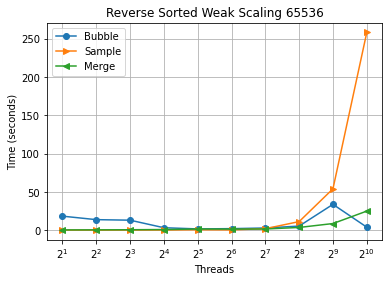

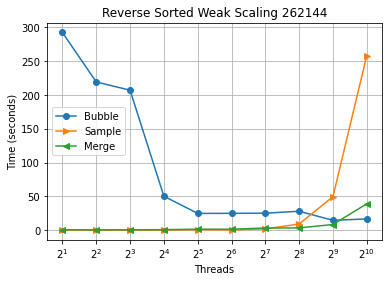

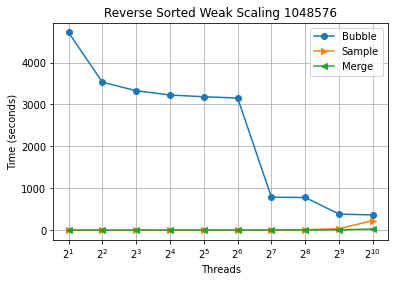

KeyError: "None of [MultiIndex([('Bubble Sort(Odd/Even)', 'Avg time/rank')],\n           )] are in the [columns]"

In [107]:
i = 0
for ctk in allctk:
    plot_mpl3(
        df=ctk.dataframe[[temp[0]]].loc["main"],
        df1= ctk.dataframe[[temp[1]]].loc["main"],
        df2= ctk.dataframe[[temp[2]]].loc["main"],
        title=f"Reverse Sorted Weak Scaling {sizes[i]}",
        xlabel="Threads",
        ylabel="Time (seconds)",
        label1='Bubble',
        label2='Sample',
        label3='Merge'
    )
    i += 1

## Speedup

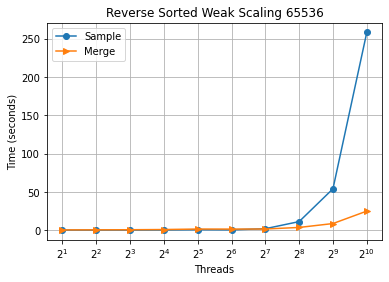

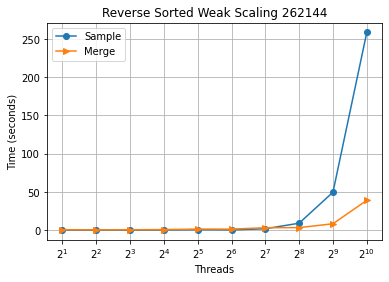

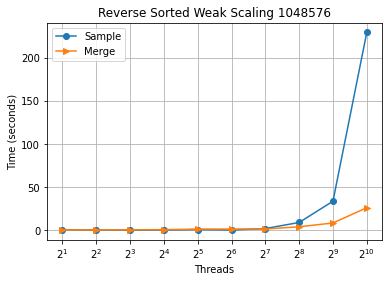

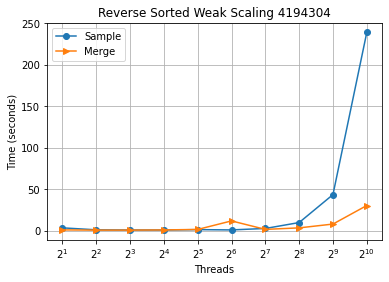

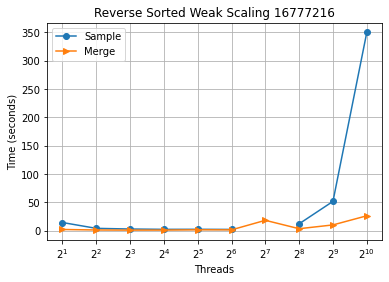

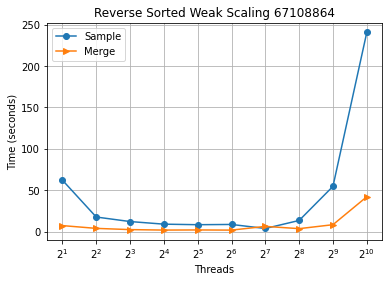

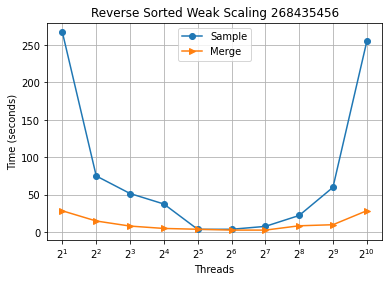

In [108]:
i = 0
for ctk in allctk:
    plot_mpl2(
        df= ctk.dataframe[[temp[1]]].loc["main"],
        df1= ctk.dataframe[[temp[2]]].loc["main"],
        title=f"Reverse Sorted Weak Scaling {sizes[i]}",
        xlabel="Threads",
        ylabel="Time (seconds)",
        label1='Sample',
        label2='Merge'
    )
    i += 1